In [1]:
import scanpy as sc
import pandas as pd
import anndata
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

font_size = 7
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size, 'legend.fontsize':font_size, 
    'legend.markerscale': 0.8, 
    'legend.loc': 'center right',
    'legend.borderpad':0,
    'legend.columnspacing': 0.5,
    'legend.labelspacing': 0.2,
    'legend.handletextpad': 0,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 1.0,
    'figure.constrained_layout.h_pad': 0.00001,
    'figure.constrained_layout.w_pad': 0.00001
   }
sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper", rc=rc)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [1]:
import sys
sys.path.append('../../')

In [2]:
adata_seqFISH = sc.read_h5ad(
    './result/multiplatform/SpaSEG_seqFISH.h5ad')
adata_seqFISH

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined', 'array_row', 'array_col', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'ground_truth_code'
    var: 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'celltype_mapped_refined_colors', 'metrics', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'

In [3]:
set(adata_seqFISH.obs['celltype_mapped_refined'].to_list())

{'Allantois',
 'Anterior somitic tissues',
 'Cardiomyocytes',
 'Cranial mesoderm',
 'Definitive endoderm',
 'Dermomyotome',
 'Endothelium',
 'Erythroid',
 'Forebrain/Midbrain/Hindbrain',
 'Gut tube',
 'Haematoendothelial progenitors',
 'Intermediate mesoderm',
 'Lateral plate mesoderm',
 'Low quality',
 'Mixed mesenchymal mesoderm',
 'NMP',
 'Neural crest',
 'Presomitic mesoderm',
 'Sclerotome',
 'Spinal cord',
 'Splanchnic mesoderm',
 'Surface ectoderm'}

In [99]:
adata_seqFISH.uns['SpaSEG_clusters_colors'][20] = '#e11000'

[<AxesSubplot:title={'center':'celltype_mapped_refined'}, xlabel='spatial1', ylabel='spatial2'>]

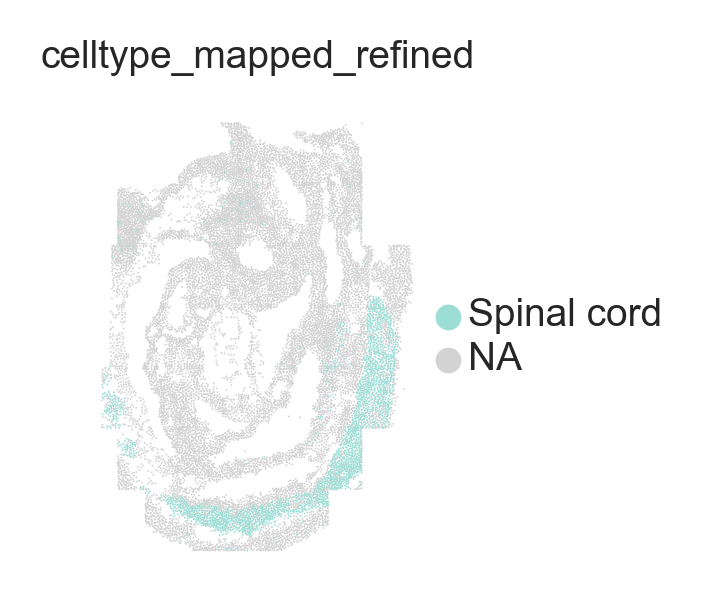

In [15]:
fig = plt.figure(figsize=(5*centimeter, 3*centimeter), dpi=400)
ax = plt.subplot(aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
sc.pl.spatial(adata_seqFISH, color=['celltype_mapped_refined'], 
              groups=['Spinal cord',],
#               groups=['Splanchnic mesoderm', 'Presomitic mesoderm', 'Mixed mesenchymal mesoderm',
#                       'Lateral plate mesoderm', 'Intermediate mesoderm', 'Cranial mesoderm', 
#                       'Cardiomyocytes', 'Endothelium', 'Dermomyotome', 'Sclerotome','Allantois'], 
              spot_size=0.03, frameon=False,
              ax=ax, show=False)
# ['Definitive endoderm', 'Gut tube']    'Endoderm'

# ax_b.set_title('SpaSEG clusters', pad=0, fontsize=7), 
# ax.set_title('Endoderm', pad=0, fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=[1, 0.48], ncol=1, frameon=False, 
#             fontsize=7, markerscale=0.8, labelspacing=0, handleheight=1.0, handlelength=1.0, )
# ax.get_legend().remove()

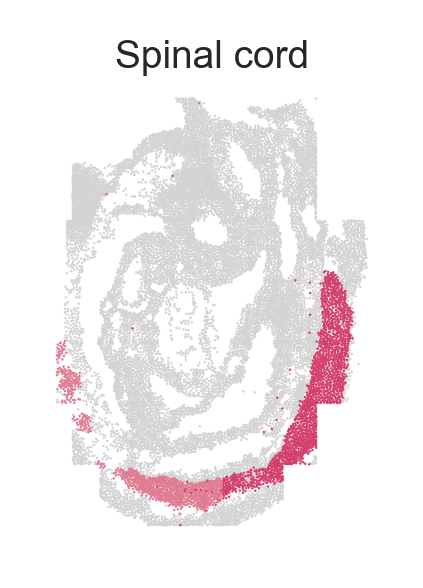

In [118]:
fig = plt.figure(figsize=(5*centimeter, 3*centimeter), dpi=400)
ax = plt.subplot(aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
sc.pl.spatial(adata_seqFISH, color=['SpaSEG_clusters'], spot_size=0.04, frameon=False, groups=[10,11],
              ax=ax, show=False)
# ax_b.set_title('SpaSEG clusters', pad=0, fontsize=7),
title = 'Spinal cord'
ax.set_title(title, pad=0, fontsize=7)
# ax.legend(ncol=1, frameon=False, bbox_to_anchor=[1, 0.48], loc='center left',  
#             fontsize=5, markerscale=0.5, labelspacing=0, handleheight=1.0, handlelength=1.0, )
ax.get_legend().remove()
plt.savefig('/media/bgi/liukeyin/SpaSEG/Fig3/Fig3_seqfish_{}.pdf'.format(title), bbox_inches='tight', format='pdf', dpi=400)

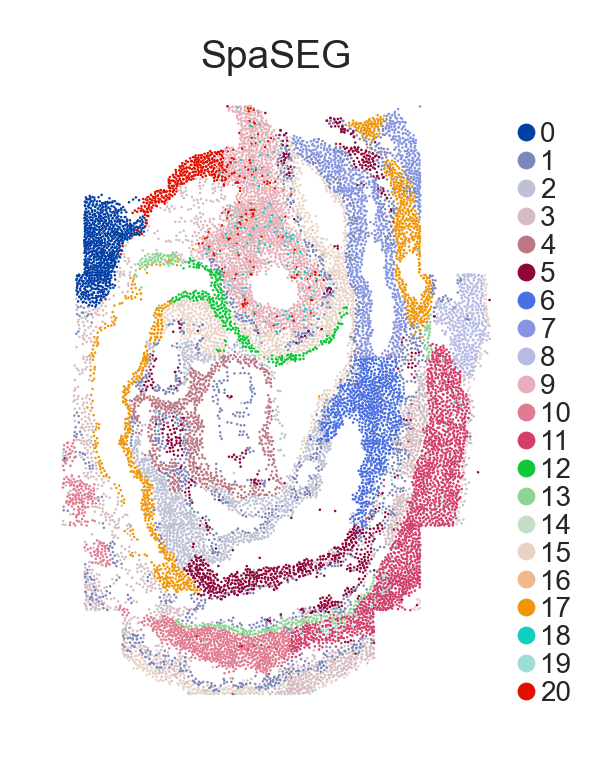

In [106]:
fig = plt.figure(figsize=(3*centimeter, 5*centimeter), dpi=400)
ax = plt.subplot(aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
sc.pl.spatial(adata_seqFISH, color=['SpaSEG_clusters'], spot_size=0.03, frameon=False, 
#               groups=[0,9,18,20],
              ax=ax, show=False)
# ax_b.set_title('SpaSEG clusters', pad=0, fontsize=7),
title = 'SpaSEG'
ax.set_title(title, pad=0, fontsize=7)
ax.legend(ncol=1, frameon=False, bbox_to_anchor=[1, 0.48], loc='center left',  
            fontsize=5, markerscale=0.5, labelspacing=0, handleheight=1.0, handlelength=1.0, )
# ax.get_legend().remove()
# plt.savefig('/media/bgi/liukeyin/SpaSEG/Fig3/Fig3_seqfish_{}.pdf'.format(title), bbox_inches='tight', format='pdf', dpi=400)